In [96]:
import numpy as np

r = np.random.rand(100,2)

In [97]:
r_half = r[0:-1:2]

In [98]:
print(r_half.shape)

(50, 2)


In [99]:
def in1d_approach(A,B):
    dims = np.maximum(B.max(0),A.max(0))+1
    return A[~np.in1d(np.ravel_multi_index(A.T,dims),np.ravel_multi_index(B.T,dims))]

In [100]:
r_other_half = in1d_approach(r_half, r)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [101]:
r.max(0)

array([0.9959    , 0.99510917])

In [102]:
A = np.array([[1,1,1], [1,1,2], [1,1,3], [1,1,4]])
B = np.array([[0,0,0], [1,0,2], [1,0,3], [1,0,4], [1,1,0], [1,1,1], [1,1,4]])

In [103]:
C = in1d_approach(A,B)

In [104]:
print(C)

[[1 1 2]
 [1 1 3]]


In [105]:
def in1d_dot_approach(A,B):
    cumdims = (np.maximum(A.max(),B.max())+1)**np.arange(B.shape[1])
    return A[~np.in1d(A.dot(cumdims),B.dot(cumdims))]

In [106]:
print(r_half)

[[0.77352581 0.8481938 ]
 [0.60625979 0.35772525]
 [0.57120536 0.84425911]
 [0.95238543 0.05344448]
 [0.24432705 0.97153922]
 [0.55460139 0.99048694]
 [0.3891063  0.88729788]
 [0.10247244 0.64412613]
 [0.47041251 0.43099034]
 [0.56457424 0.74348576]
 [0.66518321 0.72816911]
 [0.93196563 0.56423947]
 [0.88986942 0.77943747]
 [0.97529797 0.17057512]
 [0.02258149 0.49787395]
 [0.00862225 0.00220557]
 [0.21376701 0.97699935]
 [0.26717966 0.36293846]
 [0.4933896  0.40990075]
 [0.91550183 0.49318463]
 [0.40121313 0.58244518]
 [0.22374113 0.62699998]
 [0.78515908 0.11564679]
 [0.8268344  0.03346232]
 [0.08050441 0.57554911]
 [0.26827004 0.7166072 ]
 [0.81395095 0.43588568]
 [0.28271289 0.13898772]
 [0.57031702 0.62302601]
 [0.58383501 0.64438053]
 [0.85466455 0.44324571]
 [0.82201221 0.82376791]
 [0.29849174 0.72089983]
 [0.39789421 0.59253663]
 [0.26169943 0.18192581]
 [0.12858764 0.50487835]
 [0.09486208 0.8119303 ]
 [0.13333125 0.77054176]
 [0.65679712 0.60190091]
 [0.17729127 0.4153522 ]


In [107]:
np.random.shuffle(r_half)

In [108]:
print(r_half)

[[0.57031702 0.62302601]
 [0.12858764 0.50487835]
 [0.97529797 0.17057512]
 [0.28271289 0.13898772]
 [0.88986942 0.77943747]
 [0.39789421 0.59253663]
 [0.4933896  0.40990075]
 [0.26169943 0.18192581]
 [0.0684717  0.98749995]
 [0.56457424 0.74348576]
 [0.55940994 0.59621267]
 [0.26827004 0.7166072 ]
 [0.58383501 0.64438053]
 [0.13333125 0.77054176]
 [0.91550183 0.49318463]
 [0.55460139 0.99048694]
 [0.40121313 0.58244518]
 [0.93196563 0.56423947]
 [0.26717966 0.36293846]
 [0.78515908 0.11564679]
 [0.02258149 0.49787395]
 [0.57120536 0.84425911]
 [0.08050441 0.57554911]
 [0.71011798 0.13864011]
 [0.00862225 0.00220557]
 [0.29849174 0.72089983]
 [0.77352581 0.8481938 ]
 [0.8869088  0.94655884]
 [0.8268344  0.03346232]
 [0.17729127 0.4153522 ]
 [0.22374113 0.62699998]
 [0.24432705 0.97153922]
 [0.66518321 0.72816911]
 [0.10247244 0.64412613]
 [0.21376701 0.97699935]
 [0.47041251 0.43099034]
 [0.60625979 0.35772525]
 [0.28172598 0.10228464]
 [0.95238543 0.05344448]
 [0.81395095 0.43588568]


In [109]:
r_other = in1d_dot_approach(r,r_half)

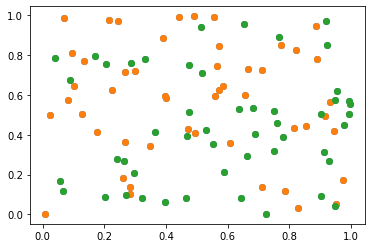

In [110]:
import matplotlib.pyplot as plt
plt.scatter(r[:,0], r[:,1])
plt.scatter(r_half[:,0], r_half[:,1], alpha = 1)
plt.scatter(r_other[:,0], r_other[:,1], alpha = 1)

In [113]:
import _maps as maps
r_half_copy = r_half.copy()
np.random.shuffle(r_half_copy)
maps.equal_ignore_order(r_half, r_half_copy)

False

In [116]:
np.array_equal(np.sort(r_half.flat), np.sort(r_half_copy.flat))

True

In [117]:
r_half_copy[0,0] = 0

In [118]:
np.array_equal(np.sort(r_half.flat), np.sort(r_half_copy.flat))

False